In [73]:
import pandas as pd

# Anomaly Detection

In [74]:
df = pd.read_json('anomaly_detection/results/aucs.json')
df = df.drop(index='catch')
df = df.round(3)

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)

df_show = df.copy()
df['mean'] = df.mean(axis=1)
df = df.round(3)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)
df

,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd,mean,mean_rank
patchtrad,0.922,0.999,0.661,0.845,0.660,0.869,0.826,2.333333
patchtst,0.696,0.999,0.626,0.843,0.622,0.882,0.778,4.000000
jepa,0.848,0.994,0.630,0.815,0.689,0.859,0.806,5.166667
patchad,0.972,0.998,0.622,0.822,0.671,0.818,0.817,5.500000
gat,0.689,0.999,0.617,0.816,0.646,0.820,0.764,6.333333
aelstm,0.664,0.998,0.612,0.840,0.618,0.828,0.760,7.666667
lstm,0.511,0.999,0.595,0.842,0.604,0.833,0.731,7.666667
tranad,0.551,0.967,0.644,0.815,0.581,0.884,0.740,8.000000
lstm_rev,0.646,0.998,0.627,0.238,0.586,0.858,0.659,8.833333
patchtst_rev,0.552,0.999,0.626,0.233,0.537,0.873,0.637,8.833333


# Forecasting

## Small

In [75]:
df = pd.read_json('forecasting/results/mse_small.json')

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df.T

,JEPAtchTST,PatchTST,JEPAtchTST
etth1,0.461953,0.512409,0.505454
etth2,0.182287,0.201699,0.21385
ettm1_univariate,0.052844,0.048413,0.091453
ettm2_univariate,0.130941,0.143944,0.23163
ettm1,0.499268,0.536895,0.542597
ettm2,0.129927,0.137828,0.173341
etth1_univariate,0.184523,0.104248,0.191407
etth2_univariate,0.304793,0.356557,0.347272
exchange_rate,0.15336,0.08904,0.179716
exchange_rate_univariate,0.080387,0.081563,0.138697


## Base

In [76]:
df = pd.read_json('forecasting/results/mse_base.json')

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df.T

,PatchTST,JEPAtchTST,JEPAtchTST
etth1,0.460798,0.458688,0.482329
etth2,0.209032,0.19144,0.205626
ettm1,0.444751,0.445688,0.47631
ettm2,0.115601,0.145122,0.130069
weather,0.186497,0.245535,0.206712
etth1_univariate,0.106821,0.158228,0.218047
etth2_univariate,0.283865,0.274855,0.278312
ettm1_univariate,0.054934,0.0999,0.076638
ettm2_univariate,0.13998,0.2059,0.140886
national_illness_univariate,4.181062,3.112235,3.825607


## Big

In [77]:
df = pd.read_json('forecasting/results/mse_big.json')

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df.T

,PatchTST,JEPAtchTST,JEPAtchTST
etth1_univariate,0.107451,0.166651,0.470768
etth1,0.447328,0.457347,1.177813
mean_rank,1.0,2.0,3.0
encoder,trainable,trainable,freeze
scratch,True,False,False


# Classification

## Small

In [89]:
df = pd.read_json('classification/results/small/accs.json')

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df

,signals_classification,mean_rank,encoder,scratch
JEPAtchTST,0.746667,1.0,trainable,False
JEPAtchTST,0.713333,2.0,freeze,False
PatchTST,0.546667,3.0,trainable,True


(-0.5, 799.5, 599.5, -0.5)

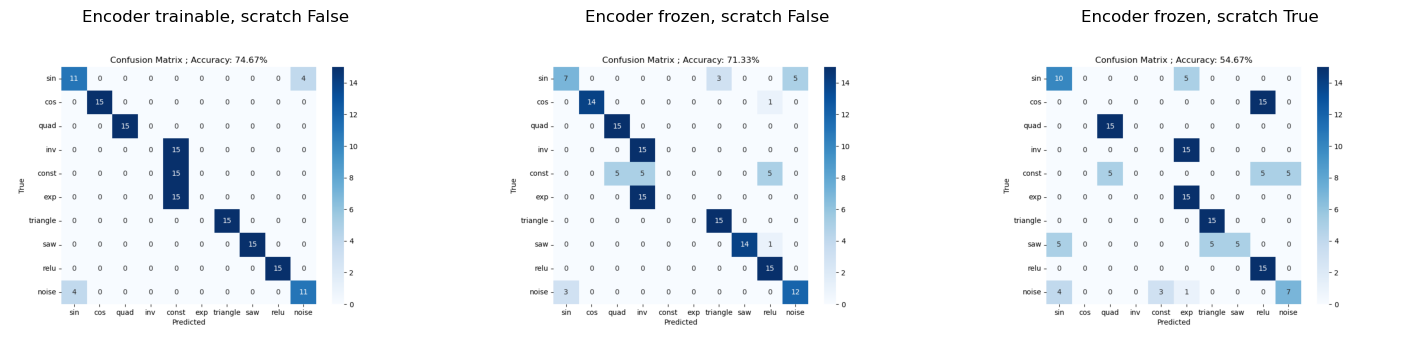

In [91]:
from PIL import Image
import matplotlib.pyplot as plt

img_encoder_finetune = Image.open('classification/results/small/confusion_matrix_False_False.png')
img_encoder_freeze = Image.open('classification/results/small/confusion_matrix_True_False.png')
img_encoder_scratch = Image.open('classification/results/small/confusion_matrix_True_True.png')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_encoder_finetune)
axes[0].set_title('Encoder trainable, scratch False')
axes[0].axis('off')

axes[1].imshow(img_encoder_freeze)
axes[1].set_title('Encoder frozen, scratch False')
axes[1].axis('off')

axes[2].imshow(img_encoder_scratch)
axes[2].set_title('Encoder frozen, scratch True')
axes[2].axis('off')

## Base

In [81]:
df = pd.read_json('classification/results/base/accs.json')

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df

,signals_classification,mean_rank,encoder,scratch
JEPAtchTST,0.900000,1.0,trainable,False
JEPAtchTST,0.766667,2.0,freeze,False
PatchTST,0.700000,3.0,trainable,True


(-0.5, 686.5, 580.5, -0.5)

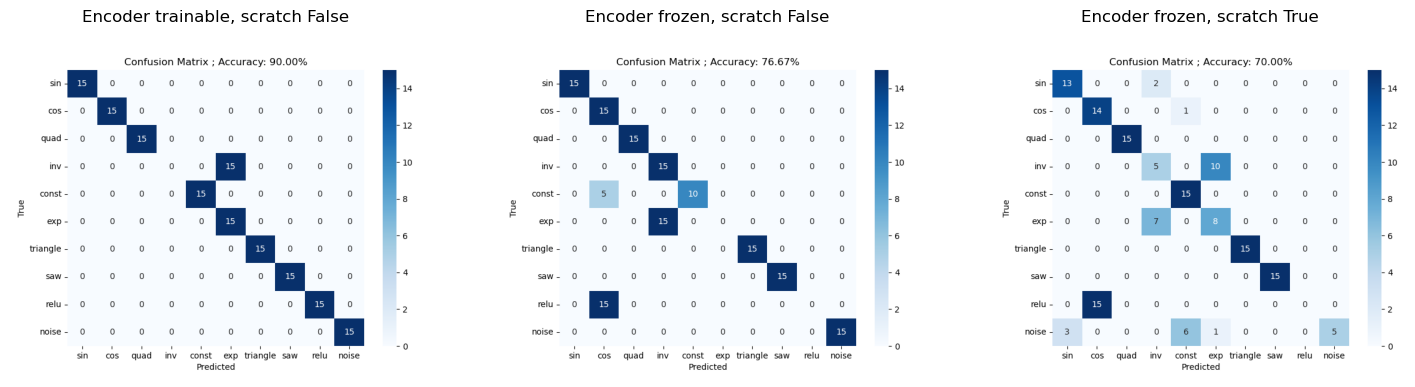

In [82]:
from PIL import Image
import matplotlib.pyplot as plt

img_encoder_finetune = Image.open('classification/results/base/confusion_matrix_False_False.png')
img_encoder_freeze = Image.open('classification/results/base/confusion_matrix_True_False.png')
img_encoder_scratch = Image.open('classification/results/base/confusion_matrix_True_True.png')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_encoder_finetune)
axes[0].set_title('Encoder trainable, scratch False')
axes[0].axis('off')

axes[1].imshow(img_encoder_freeze)
axes[1].set_title('Encoder frozen, scratch False')
axes[1].axis('off')

axes[2].imshow(img_encoder_scratch)
axes[2].set_title('Encoder frozen, scratch True')
axes[2].axis('off')

## Big

In [83]:
df = pd.read_json('classification/results/big/accs.json')

ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
df

,signals_classification,mean_rank,encoder,scratch
JEPAtchTST,0.800000,1.0,trainable,False
JEPAtchTST,0.746667,2.0,freeze,False
PatchTST,0.653333,3.0,trainable,True


(-0.5, 799.5, 599.5, -0.5)

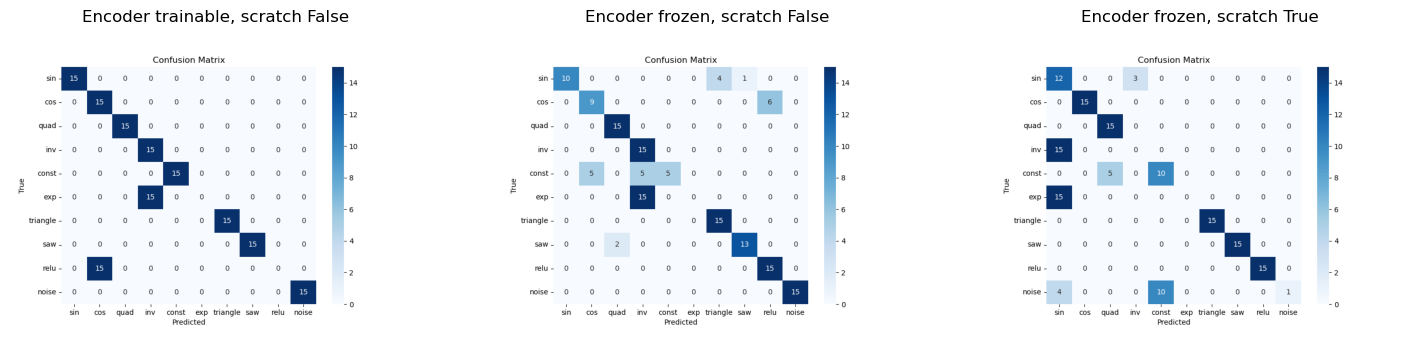

In [84]:
from PIL import Image
import matplotlib.pyplot as plt

img_encoder_finetune = Image.open('classification/results/big/confusion_matrix_False_False.png')
img_encoder_freeze = Image.open('classification/results/big/confusion_matrix_True_False.png')
img_encoder_scratch = Image.open('classification/results/big/confusion_matrix_True_True.png')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_encoder_finetune)
axes[0].set_title('Encoder trainable, scratch False')
axes[0].axis('off')

axes[1].imshow(img_encoder_freeze)
axes[1].set_title('Encoder frozen, scratch False')
axes[1].axis('off')

axes[2].imshow(img_encoder_scratch)
axes[2].set_title('Encoder frozen, scratch True')
axes[2].axis('off')